In [392]:
import sympy as sym
from sympy.functions import exp
from sympy.abc import x

In [393]:
x

x

Resolver el problema de regresión:

$$\underset{\alpha, \mu}{\operatorname{min}} J(\alpha, \mu) = \frac{1}{2n}\sum_{i=1}^n (\alpha \Phi(x_i) - y_i)^2$$

Para el caso donde m=1 y $\Phi = \phi$.

Derivadas parciales de cada $\phi_j$:

$$\frac{\partial}{\partial \mu} \phi_j = - \phi \frac{(x - \mu_j)}{\sigma ^ 2}$$

$$\frac{\partial}{\partial \mu} J(\alpha, \mu)  =  2/n * (\alpha, \mu) \frac{\partial}{\partial \mu} \phi_j$$


El Jacobiano de $\Phi = \phi_j$:

- Con $\a$ constante:
$$\nabla_x\Phi = \frac{\partial}{\partial \mu} \phi_j$$

Gradiente:

$$\alpha_j = \alpha_j - k$$

In [394]:
import numpy as np
import matplotlib.pyplot as plt

sig_cons = 2
# alpha_cons = 10

def phi_j(x, mu_j):
    sig = sig_cons # Sigma constante
    phi = np.exp( - (x - mu_j)**2 / (2 * sig**2))
    return phi

def partial_phi_mu(x, mu_j):
    sig = sig_cons # Sigma constante
    phi = phi_j(x, mu_j)
    part_phi_mu = ((x - mu_j) / sig**2)  * phi
    return part_phi_mu

def error():
    pass

def J(x, y, mu):
#     alpha = alpha_cons
    J = (1 / 2 * len(x)) * np.sum((alpha_cons*phi_j(x, mu) - y ))
    return J

# Gradient J, por ahora es igual a la parcial de J con respecto a mu
def grad_J_mu(x, y, mu):
   
    partial_J_mu = (- 2  * (y - phi_j(x, mu)))*(partial_phi_mu(x, mu))
    
    return partial_J_mu.sum()
    

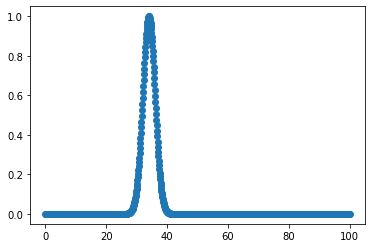

In [395]:
# Datos de ejemplo, comenzamos con una sola curva
x = np.linspace(0, 100, 1000)
yt = phi_j(x, 34) 

plt.scatter(x, yt)

In [396]:
# Inicializamos mu
mu = 1
Mus = []
n_iter = 1000
lr = 0.1

for t in range(n_iter):
    p =  grad_J_mu(x, yt, mu)
    mu = mu - p*lr
    Mus.append(mu)
    
Mus

[0.2416104566323527,
 -0.7365642116915756,
 -1.6246682983599836,
 -2.1621254247395782,
 -2.489557991284341,
 -2.71510810183382,
 -2.8842246784295185,
 -3.0182445821132142,
 -3.128577121800852,
 -3.2219538080109826,
 -3.3026482449880254,
 -3.373529791378279,
 -3.4366114980589737,
 -3.49335643390632,
 -3.5448592173763394,
 -3.5919588634020165,
 -3.6353117875825016,
 -3.67544065577158,
 -3.7127680297978287,
 -3.7476401289663324,
 -3.7803439825613947,
 -3.811120052959357,
 -3.8401716861215327,
 -3.867672296209279,
 -3.8937709034730155,
 -3.918596456437101,
 -3.942261243718407,
 -3.9648636152357373,
 -3.9864901732753824,
 -4.007217552144287,
 -4.027113875337638,
 -4.046239957576077,
 -4.0646503032611845,
 -4.082393941182431,
 -4.09951512653304,
 -4.1160539346530545,
 -4.132046765848654,
 -4.147526776732582,
 -4.162524250499196,
 -4.177066916176009,
 -4.191180225024758,
 -4.204887590782373,
 -4.218210599248418,
 -4.231169191774714,
 -4.2437818264445575,
 -4.256065620104988,
 -4.2680364739060

La final>
$$\underset{\alpha, \mu}{\operatorname{min}} J(\alpha, \mu) =  \frac{1}{2n}\sum_{i=1}^n \left( \sum_{j=1}^m\alpha_j\phi_j(x_i) - y_i)^2 \right)$$

In [397]:
def normal_distribution(x: np.ndarray, mean: float = 0, standard_deviation: float = 2) -> np.ndarray:
    exponent =  (- (x - mean) ** 2) / (2 * standard_deviation**2)
    return np.exp(exponent)

def phi_j(x, mu_j):
    sig = sig_cons # Sigma constante
    phi = np.exp( - (x - mu_j)**2 / (2 * sig**2))
    return phi


def build_approximately_normal_distribution(n: int, mu: float = 0, sigma: float = 1):
    x: np.ndarray = np.arange(-10, 10, 20/n)
    y: np.ndarray = normal_distribution(x, mean=mu, standard_deviation=sigma)
    noise = 0.01 * np.random.normal(size=y.shape[0])
    y += noise

    return x, y


def d_normal_d_mu(x: np.ndarray, mean: float = 0, standard_deviation: float = 1) -> np.ndarray:
    a = 1/(standard_deviation**2)
    exponent = (- (x - mean)**2)/(2 * standard_deviation**2)
    b = x - mean

    return a * np.exp(exponent) * b


def d_normal_d_sigma(x: np.ndarray, mean: float = 0, standard_deviation: float = 1) -> np.ndarray:
    a = 1/  standard_deviation**2
    exponent = (- (x - mean)**2)/(2 * standard_deviation**2)
    b = ((x - mean)**2)/(standard_deviation**3) - 1

    return np.exp(exponent) * a * b


def non_linear_least_square_regression(f, f_primes, beta: np.ndarray, 
                                       x: np.ndarray, y: np.ndarray, number_of_iterations: int = 250):
    gamma: float = 3e-1
    cost: float
    for epoch in range(number_of_iterations):
        cost: float = ((y - f(x, *beta)) ** 2).sum()
        print(f"Cost at epoch {epoch}:", cost)

        dLdf: np.ndarray = -2 * (y - f(x, *beta))
        nablaL = []
        for f_prime in f_primes:
            nablaL.append((dLdf * f_prime(x, *beta)).sum())

        beta -= gamma * np.array(nablaL)
        
    return beta

In [398]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math

In [399]:
def normal_distribution(x: np.ndarray, mean: float = 0, standard_deviation: float = 2) -> np.ndarray:
    exponent = - ((x - mean) ** 2) / (2 * standard_deviation**2)
    return np.exp(exponent)

def phi_j(x, mu_j):
    sig = sig_cons # Sigma constante
    phi = np.exp( - (x - mu_j)**2 / (2 * sig**2))
    return phi

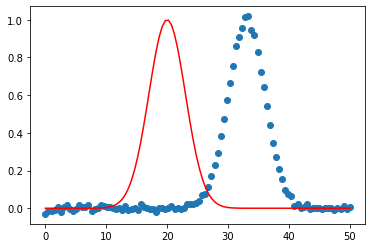

In [524]:
def build_approximately_normal_distribution(x, mu: float = 0, sigma: float = 1, noise = 0.01):
    y: np.ndarray = normal_distribution(x, mean=mu, standard_deviation=sigma)
    noise = noise * np.random.normal(size=y.shape[0])
    y += noise

    return y

mu = 33
sig_cons = 3
x = np.linspace(0, 50, 100)
y = build_approximately_normal_distribution(
    x, mu=mu, sigma=sig_cons)

mu_init = 20
y_init = build_approximately_normal_distribution(
    x, mu=mu_init, sigma=sig_cons, noise=0)

plt.scatter(x, y)
plt.plot(x, y_init, c='red' )

In [525]:

def d_normal_d_mu(x: np.ndarray, mean: float = 0, standard_deviation: float = 2) -> np.ndarray:
    a = 1/(standard_deviation**2)
    exponent = (- (x - mean)**2)/(2 * standard_deviation**2)
    b = x - mean

    return a * np.exp(exponent) * b


def partial_phi_mu(x, mu_j):
    sig = sig_cons # Sigma constante
    phi = phi_j(x, mu_j)
    part_phi_mu = - ((x - mu_j) / sig**2)  * phi
    return part_phi_mu


In [526]:
def non_linear_least_square_regression(f, f_primes, beta: np.ndarray, 
                                       x: np.ndarray, y: np.ndarray, 
                                       number_of_iterations: int = 250):
    gamma: float = 3e-1
    cost: float
    for epoch in range(number_of_iterations):
        cost: float = ((y - f(x, *beta)) ** 2).sum()
        print(f"Cost at epoch {epoch}:", cost)

        dLdf: np.ndarray = -2 / len(x) * (y - f(x, *beta))
        nablaL = []
        for f_prime in f_primes:
            nablaL.append((dLdf * f_prime(x, *beta)).sum())

        beta -= gamma * np.array(nablaL)
        
    return beta

def J(x, y, mu):
    residual = y - phi_j(x, mu)
    cost = (residual).dot(residual) 
    return cost


def partial_J_mu(x, y, mu):
    dJ_df = (y - phi_j(x, mu))
    dp_dmu = partial_phi_mu(x, mu)
    dJ_dmu = dJ_df.dot(dp_dmu) 
    return dJ_dmu


def GD(f, f_primes, mu, 
       x, y, lr,
       n_iter = 250):

    for t in range(n_iter):
        cost = J(x, y, mu)
        print(f"Cost at epoch {t}:", cost)

        nablaJ = []
        for f_prime in f_primes:
#             nablaL.append((dLdf.dot(f_prime(x, *mu))))
            nablaJ = partial_J_mu(x, y, mu)

        mu = mu - lr*nablaJ
        
    return mu

#### Hay que poner una base para inicializar mu0

In [527]:
GD(phi_j, 
    [partial_phi_mu], np.array([mu_init], 
    dtype=np.float64), x, y, lr=0.1, n_iter=1000)

Cost at epoch 0: 20.878279108923273
Cost at epoch 1: 20.87700052347806
Cost at epoch 2: 20.87570940878449
Cost at epoch 3: 20.8744055933635
Cost at epoch 4: 20.87308890270217
Cost at epoch 5: 20.871759159187796
Cost at epoch 6: 20.870416182040174
Cost at epoch 7: 20.869059787242243
Cost at epoch 8: 20.867689787468834
Cost at epoch 9: 20.866305992013626
Cost at epoch 10: 20.864908206714126
Cost at epoch 11: 20.86349623387472
Cost at epoch 12: 20.862069872187682
Cost at epoch 13: 20.860628916652058
Cost at epoch 14: 20.85917315849045
Cost at epoch 15: 20.857702385063494
Cost at epoch 16: 20.85621637978212
Cost at epoch 17: 20.854714922017394
Cost at epoch 18: 20.853197787007936
Cost at epoch 19: 20.851664745764825
Cost at epoch 20: 20.850115564973894
Cost at epoch 21: 20.84855000689538
Cost at epoch 22: 20.846967829260755
Cost at epoch 23: 20.845368785166755
Cost at epoch 24: 20.843752622966452
Cost at epoch 25: 20.84211908615729
Cost at epoch 26: 20.840467913265968
Cost at epoch 27: 20.

Cost at epoch 591: 0.010887720954144444
Cost at epoch 592: 0.010887720954144439
Cost at epoch 593: 0.01088772095414443
Cost at epoch 594: 0.010887720954144428
Cost at epoch 595: 0.010887720954144423
Cost at epoch 596: 0.01088772095414442
Cost at epoch 597: 0.01088772095414442
Cost at epoch 598: 0.010887720954144408
Cost at epoch 599: 0.010887720954144411
Cost at epoch 600: 0.010887720954144399
Cost at epoch 601: 0.010887720954144402
Cost at epoch 602: 0.010887720954144406
Cost at epoch 603: 0.0108877209541444
Cost at epoch 604: 0.010887720954144402
Cost at epoch 605: 0.010887720954144394
Cost at epoch 606: 0.010887720954144399
Cost at epoch 607: 0.0108877209541444
Cost at epoch 608: 0.010887720954144399
Cost at epoch 609: 0.010887720954144392
Cost at epoch 610: 0.010887720954144392
Cost at epoch 611: 0.010887720954144394
Cost at epoch 612: 0.010887720954144387
Cost at epoch 613: 0.01088772095414439
Cost at epoch 614: 0.010887720954144395
Cost at epoch 615: 0.010887720954144397
Cost at 

array([33.00397167])